<a href="https://colab.research.google.com/github/aninda-ghosh/Deep-Learning/blob/master/ResNet_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference Code

This code is taken from this blog: https://vitalflux.com/pytorch-load-predict-pretrained-resnet-model/


In [ ]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [ ]:
# For Part C, you need to change this and load another ResNet Model
resnet = models.resnet50 (pretrained = True)

In [ ]:
# Print Model architecture
resnet

In [ ]:
# download a image in sample_data folder
# For part B, you need save 20 images in this folder for inference.
!mkdir sample_data/images/
!wget https://t2.ea.ltmcdn.com/en/razas/0/0/1/labrador-retriever_100_0_orig.jpg -P sample_data/images/

mkdir: cannot create directory ‘sample_data/images/’: File exists
--2023-02-01 23:03:54--  https://t2.ea.ltmcdn.com/en/razas/0/0/1/labrador-retriever_100_0_orig.jpg
Resolving t2.ea.ltmcdn.com (t2.ea.ltmcdn.com)... 89.187.162.136, 143.244.33.161, 89.187.162.143, ...
Connecting to t2.ea.ltmcdn.com (t2.ea.ltmcdn.com)|89.187.162.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23915 (23K) [image/jpeg]
Saving to: ‘sample_data/images/labrador-retriever_100_0_orig.jpg.1’

labrador-retriever_ 100%[===================>]  23.35K  --.-KB/s    in 0.001s  

2023-02-01 23:03:55 (27.3 MB/s) - ‘sample_data/images/labrador-retriever_100_0_orig.jpg.1’ saved [23915/23915]



In [ ]:
# load the image
from PIL import Image
img_dog = Image.open ('sample_data/images/labrador-retriever_100_0_orig.jpg').convert ('RGB')

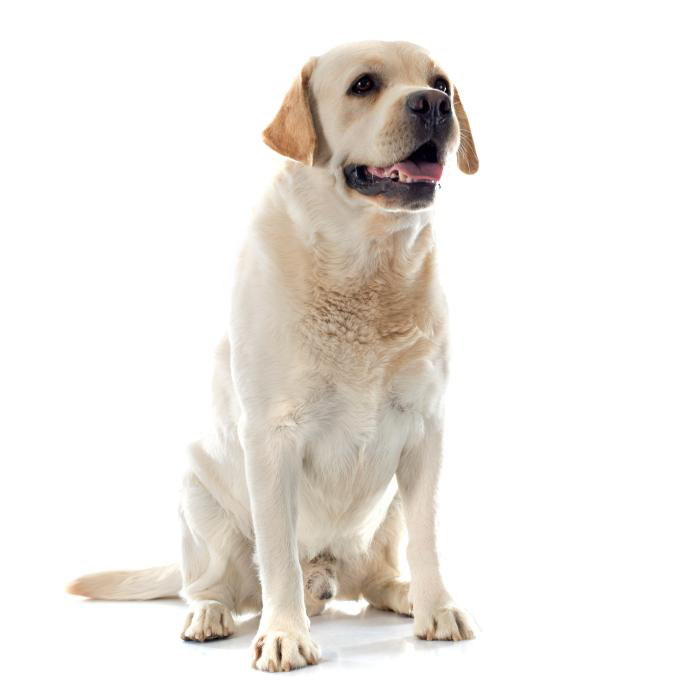

In [ ]:
# Display images
img_dog

In [ ]:
# What's the image size??
img_dog.size

(693, 693)

In [ ]:
# imports for Image transformations
from torchvision import transforms

In [ ]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
          mean=[0.485, 0.456, 0.406],
          std=[0.229, 0.224, 0.225])
    ])
img_dog_processed = preprocess (img_dog)

In [ ]:
img_dog_processed.shape

torch.Size([3, 224, 224])

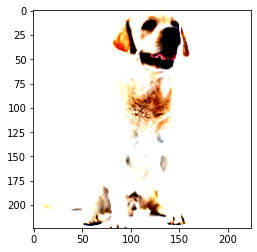

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(  img_dog_processed.permute(1, 2, 0)  )

In [ ]:
#
# Reshape, crop, and normalize the input tensor for feeding into network for evaluation
#
import torch
batch_img_dog_tensor = torch.unsqueeze(img_dog_processed, 0)

In [ ]:
# shape of input
batch_img_dog_tensor.shape

torch.Size([1, 3, 224, 224])

In [ ]:
# Change to evaluation mode from training mode
resnet.eval ()

In [ ]:
# Prediction
out = resnet(batch_img_dog_tensor)

In [ ]:
# What prediction looks like??
out

In [ ]:
# Shape of prediction
out.shape

torch.Size([1, 1000])

In [ ]:
out[0][200:210]

tensor([ 3.1991,  0.8297,  0.3544,  0.9005,  2.5422,  6.6550,  7.0526, 16.0910,
        18.1032,  8.3230], grad_fn=<SliceBackward0>)

In [ ]:
# Finding the maximum index
torch.max(out, 1)

torch.return_types.max(
values=tensor([18.1032], grad_fn=<MaxBackward0>),
indices=tensor([208]))

In [ ]:
# Download the index to class name mapping
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2023-02-01 23:10:05--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.1’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2023-02-01 23:10:05 (109 MB/s) - ‘imagenet_classes.txt.1’ saved [10472/10472]



Changes for Part A

In [ ]:
# For Part A, you need to select 10 classes from this list
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [ ]:
labels[456]

'bow'

In [ ]:
#
# Find the index (tensor) corresponding to the maximum score in the out tensor.
# Torch.max function can be used to find the information
#
_, index = torch.max(out, 1)
#
# Find the score in terms of percentage by using torch.nn.functional.softmax function
# which normalizes the output to range [0,1] and multiplying by 100
#
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
#
# Print the name along with score of the object identified by the model
#
print(labels[index[0]], percentage[index[0]].item())
#
# Print the top 5 scores along with the image label. Sort function is invoked on the torch to sort the scores.
#
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Labrador retriever 87.9219741821289


[('Labrador retriever', 87.9219741821289),
 ('golden retriever', 11.755631446838379),
 ('kuvasz', 0.2197169065475464),
 ('clumber', 0.030994903296232224),
 ('beagle', 0.021491358056664467)]

In [ ]:
percentage[200:210]

tensor([1.0575e-04, 6.4322e-06, 1.9784e-04, 1.0426e-03, 4.1933e-05, 1.2351e-03,
        7.1764e-03, 1.8278e+00, 8.8293e+01, 3.0652e-02],
       grad_fn=<SliceBackward0>)

# Homework 2

Changes for Part A

In [ ]:
model_parta = # declare your model here

# code to display 20 images, transformed images, their prediction index, class, and confidence score

SyntaxError: ignored

Changes for Part B

In [ ]:
model_partb = # declare your model here

# code to display 20 images, transformed images, their prediction index, class, and confidence score

Changes for Part C

In [ ]:
model_partc = # declare your model here

# code to display 20 images, transformed images, their prediction index, class, and confidence score

In [ ]:
# Display comparison between results from parta, partb and partc.